In [1]:
import os

import matplotlib.pyplot as plt
import sinter

from qecdec import RotatedSurfaceCode_Memory

In [2]:
def generate_sinter_tasks():
    tasks: list[sinter.Task] = []
    for d in [5, 7, 9, 11]:
        for p in [0.01, 0.02, 0.03, 0.04, 0.05]:
            # Setup the experiment.
            expmt_d_rounds = RotatedSurfaceCode_Memory(
                d=d,
                rounds=d,
                basis='Z',
                data_qubit_error_rate=p,
                meas_error_rate=p,
            )

            # Setup a sinter.Task with MWPM decoder.
            tasks.append(sinter.Task(
                circuit=expmt_d_rounds.circuit,
                detector_error_model=expmt_d_rounds.dem,
                decoder='pymatching',
                json_metadata={'d': d, 'p': p, 'r': d, 'group': 'd_rounds'},
            ))
    return tasks


tasks = generate_sinter_tasks()

In [3]:
sinter_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    max_shots=10_000_000,
    max_errors=100,
    tasks=tasks,
    print_progress=True,
)

Starting 7 workers...
20 tasks left:
  workers    decoder eta shots_left errors_left json_metadata                  
        1 pymatching <1m    9991535          75 d=5,p=0.01,r=5,group=d_rounds  
        1 pymatching   ?   10000000         100 d=5,p=0.02,r=5,group=d_rounds  
        1 pymatching   ?   10000000         100 d=5,p=0.03,r=5,group=d_rounds  
        1 pymatching   ?   10000000         100 d=5,p=0.04,r=5,group=d_rounds  
        1 pymatching   ?   10000000         100 d=5,p=0.05,r=5,group=d_rounds  
        1 pymatching   ?   10000000         100 d=7,p=0.01,r=7,group=d_rounds  
        1 pymatching   ?   10000000         100 d=7,p=0.02,r=7,group=d_rounds  
        0 pymatching ?·∞   10000000         100 d=7,p=0.03,r=7,group=d_rounds  
        0 pymatching ?·∞   10000000         100 d=7,p=0.04,r=7,group=d_rounds  
        0 pymatching ?·∞   10000000         100 d=7,p=0.05,r=7,group=d_rounds  
        0 pymatching ?·∞   10000000         100 d=9,p=0.01,r=9,group=d_rounds  
   

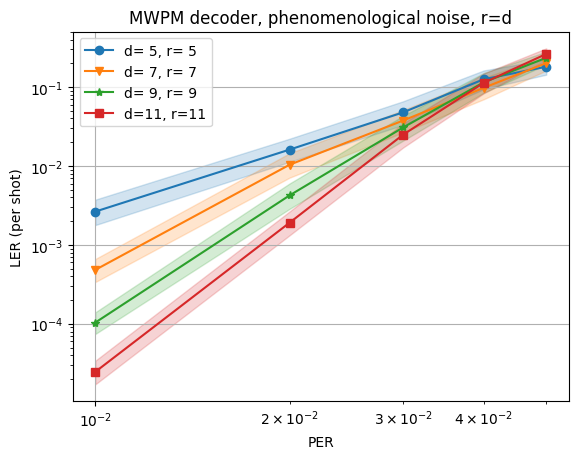

In [4]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=sinter_stats,
    group_func=lambda stat: f"d={stat.json_metadata['d']:2d}, r={stat.json_metadata['r']:2d}",
    x_func=lambda stat: stat.json_metadata['p'],
)
ax.loglog()
ax.grid()
ax.set_ylabel('LER (per shot)')
ax.set_xlabel('PER')
ax.set_title('MWPM decoder, phenomenological noise, r=d')
ax.legend()

In [5]:
const_rounds = 1


def generate_sinter_tasks():
    tasks: list[sinter.Task] = []
    for d in [5, 7, 9, 11]:
        for p in [0.01, 0.02, 0.03, 0.04, 0.05]:
            # Setup the experiment.
            expmt_const_rounds = RotatedSurfaceCode_Memory(
                d=d,
                rounds=const_rounds,
                basis='Z',
                data_qubit_error_rate=p,
                meas_error_rate=p,
            )

            # Setup a sinter.Task with MWPM decoder.
            tasks.append(sinter.Task(
                circuit=expmt_const_rounds.circuit,
                detector_error_model=expmt_const_rounds.dem,
                decoder='pymatching',
                json_metadata={'d': d, 'p': p, 'r': const_rounds, 'group': 'const_rounds'},
            ))
    return tasks


tasks = generate_sinter_tasks()

In [6]:
sinter_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    max_shots=10_000_000,
    max_errors=100,
    tasks=tasks,
    print_progress=True,
)

Starting 7 workers...
20 tasks left:
  workers    decoder        eta shots_left errors_left json_metadata                     
        1 pymatching          ?   10000000         100 d=5,p=0.01,r=1,group=const_rounds 
        1 pymatching          ?   10000000         100 d=5,p=0.02,r=1,group=const_rounds 
        1 pymatching [draining]    9993583          -5 d=5,p=0.03,r=1,group=const_rounds 
        1 pymatching          ?   10000000         100 d=5,p=0.04,r=1,group=const_rounds 
        1 pymatching          ?   10000000         100 d=5,p=0.05,r=1,group=const_rounds 
        1 pymatching          ?   10000000         100 d=7,p=0.01,r=1,group=const_rounds 
        1 pymatching          ?   10000000         100 d=7,p=0.02,r=1,group=const_rounds 
        0 pymatching        ?·∞   10000000         100 d=7,p=0.03,r=1,group=const_rounds 
        0 pymatching        ?·∞   10000000         100 d=7,p=0.04,r=1,group=const_rounds 
        0 pymatching        ?·∞   10000000         100 d=7,p=0.

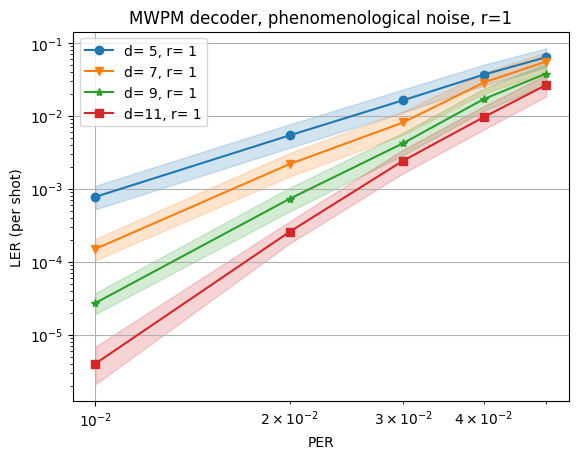

In [7]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=sinter_stats,
    group_func=lambda stat: f"d={stat.json_metadata['d']:2d}, r={stat.json_metadata['r']:2d}",
    x_func=lambda stat: stat.json_metadata['p'],
)
ax.loglog()
ax.grid()
ax.set_ylabel('LER (per shot)')
ax.set_xlabel('PER')
ax.set_title(f'MWPM decoder, phenomenological noise, r={const_rounds}')
ax.legend()